# 일반 API request

In [1]:
import requests

url1 = 'https://api.github.com/events'
url2 = 'http://travis.kw.ac.kr/data/http-file1.html'

response = requests.get(url2)

# header 정보
response.headers


# body 정보
response.text 


'<html>\n\t<head>\n\t\t  <title> CoNA Lab </title>\n\t</head>\n\t<body>\n\t\t<p>Welcome to the first HTTP file!</p>\n\t\t<a href="http://cona.kw.ac.kr">CoNA Lab</a>\n\t</body>\n</html>\n'

# Naver API request

In [2]:
import requests
import pandas as pd

client_id = 'prZ4PNlMmkzV4xEE3emY'
client_secret = 'kEMtulCxTq'

url = 'https://openapi.naver.com/v1/search/news.json'
params = {'query':'비트코인','display':3,'sort':'date'}
headers = {'X-Naver-Client-Id':client_id,
          'X-Naver-Client-Secret':client_secret}

response = requests.get(url, params=params, headers=headers)
response.status_code 

# Get 3 News article
data = response.json()

# Show title of 3 News article
for item in data['items']:
    print(item['title'])
    

df = pd.DataFrame(data['items'])
del df['originallink']
df

ETF 승인 기대 고조에...<b>비트코인</b> 4700만원대 '꿋꿋'
&quot;<b>비트코인</b> 현물 ETF, 자본시장·가상자산시장 교점&quot;
하이퍼리즘, 영국의 탈중앙화 해커하우스 ‘홈다오’에 투자


title  \
0        ETF 승인 기대 고조에...<b>비트코인</b> 4700만원대 '꿋꿋'   
1  &quot;<b>비트코인</b> 현물 ETF, 자본시장·가상자산시장 교점&quot;   
2                 하이퍼리즘, 영국의 탈중앙화 해커하우스 ‘홈다오’에 투자   

                                                link  \
0  https://www.pinpointnews.co.kr/news/articleVie...   
1  https://n.news.naver.com/mnews/article/001/001...   
2                  https://platum.kr/archives/216834   

                                         description  \
0  대장주 <b>비트코인</b>이 현물 상장지수펀드(ETF) 승인 기대감에 1% 뛰며 ...   
1  금융투자협회 주관 토큰증권 토론회 미국 증권거래위원회(SEC)의 승인이 임박했다고 ...   
2  지난 2018년 1월 설립돼 한국과 일본에 거점을 두고 법인 및 적격투자자를 대상으...   

                           pubDate  
0  Thu, 09 Nov 2023 10:14:00 +0900  
1  Thu, 09 Nov 2023 10:13:00 +0900  
2  Thu, 09 Nov 2023 10:02:00 +0900

# 공공데이터포털 API

In [2]:
# Python3 샘플 코드 #

from pprint import pprint
import requests
import pandas as pd


national_code='112'
ed_code = 'E'

service_url = 'http://openapi.tour.go.kr/openapi/service/'\
            'EdrcntTourismStatsService/getEdrcntTourismStatsList'


service_key = 'jLbujAlAtIYCtKYsZg0cNPMuE1Kh3tR/+WPXApudQQw9mK3w/7c3NtPVKetSAnpWr/z+8fh+50imBvQQrFAgIw=='



# Request parameter
params ={'_type':'json',
        'serviceKey' : service_key, 
         'YM' : '201908', 
         'NAT_CD' : national_code, 
         'ED_CD' : ed_code}


# Requesting
response = requests.get(service_url, params=params)
response.status_code

# Reponse data
data=response.json()
data

# # 2019년 8월 관광객 수
# num = data['response']['body']['items']['item']['num']

# # 관광객이 한국 방문한 날짜
# ym = data['response']['body']['items']['item']['ym']



# Create data from 2017.1 ~ 2022.12
result = []

for year in range(2017,2023):
    for month in range(1,13):
        yyyymm='{0}{1:0>2}'.format(str(year),str(month))
        params['YM'] = yyyymm
        response = requests.get(service_url,params=params)
        
        if response.status_code == 200:
            data = response.json()
            ym = data['response']['body']['items']['item']['ym']
            num = data['response']['body']['items']['item']['num']
            print(ym,num)
            result.append({'연월':ym,'입국자수':num})
        else:
            print('Errorcode:'+response.status_code)

            
# Create DataFrame
columns = ['연월','입국자수']
df = pd.DataFrame(result,columns=columns)
df.head()

df['연월'] = df['연월'].apply(str)
df['연월'].dtype  # data type of element 
df

201701 565243
201702 590790
201703 360782
201704 227811
201705 253359
201706 254930
201707 281263
201708 339388
201709 318682
201710 345384
201711 299247
201712 332474
201801 305127
201802 345341
201803 403413
201804 366604
201805 370222
201806 379891
201807 410337
201808 478140
201809 434595
201810 475307
201811 404256
201812 416279
201901 392814
201902 453379
201903 487623
201904 493250
201905 500413
201906 475007
201907 519132
201908 578112
201909 541350
201910 567695
201911 505369
201912 508877
202001 481681
202002 104086
202003 16595
202004 3935
202005 5124
202006 5051
202007 9738
202008 16275
202009 15307
202010 11477
202011 9174
202012 7987
202101 7346
202102 11982
202103 18980
202104 16830
202105 14221
202106 12942
202107 13469
202108 17103
202109 19144
202110 14035
202111 12472
202112 11691
202201 9489
202202 16752
202203 14726
202204 10230
202205 11253
202206 12741
202207 17907
202208 30248
202209 29531
202210 22940
202211 24174
202212 27367


연월    입국자수
0   201701  565243
1   201702  590790
2   201703  360782
3   201704  227811
4   201705  253359
..     ...     ...
67  202208   30248
68  202209   29531
69  202210   22940
70  202211   24174
71  202212   27367

[72 rows x 2 columns]

C:\Users\me\AppData\Local\Temp\ipykernel_12792\3780746780.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0, 0.5, '입국자수')

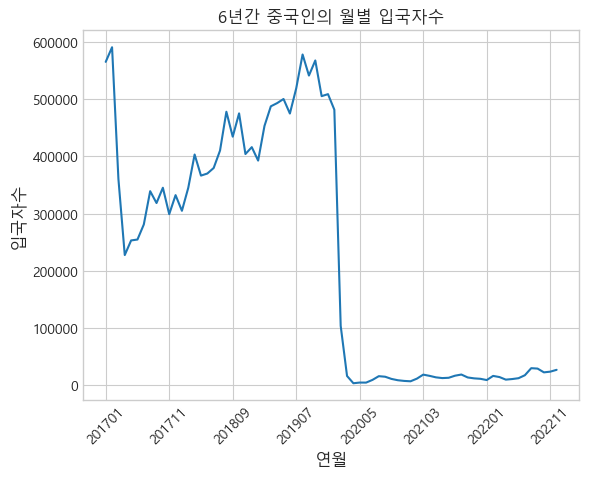

In [3]:
# Create a graph

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

plt.rc('font',family='Malgun Gothic') # 한글폰트 사용
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(9)) # Max tick = 9
plt.xticks(rotation=45) # prevent overlapping of x axls label

plt.plot(df['연월'], df['입국자수'])
plt.title('6년간 중국인의 월별 입국자수')
plt.xlabel('연월',fontsize=12)
plt.ylabel('입국자수',fontsize=12)

# Web Scraping using Beautiful Soup

In [22]:
from bs4 import BeautifulSoup
import requests

[<dd class="desc">1.0°</dd>,
 <dd class="desc">33%</dd>,
 <dd class="desc">1.2m/s</dd>]

### Weather info from Naver

In [ ]:
url = 'https://search.naver.com/search.naver?ie=UTF-8&query=%ED%98%84%EC%9E%AC+%EC%98%A8%EB%8F%84&sm=chr_hty'

headers={'Accept-Language':'ko-KR',
        'User-Agent':'Mozilla/5.0'}

# HTTP request & response from naver
response = requests.get(url,headers=headers)
response.status_code


# Parsing HTTP response data
soup = BeautifulSoup(response.text,'html.parser')
type(soup)





# 1. Parse div with temperature
tag = soup.select_one('div.temperature_text')


# Extract text only 
temp = tag.get_text()
temp





# 2. Parse div with humidity and wind speed
tag = soup.select_one('dl.summary_list>dd.desc')

#  Extract text only 
cast = tag.get_text()
cast


# Extract precipitation level
tag = soup.select_one('dl.summary_list>dd.desc')
cast = tag.get_text()
cast


# Select all  dd.desc tags
tag = soup.select_one('dl.summary_list').select('dd.desc')
tag



# Get text from 2nd dd.desc tag
cast = tag[1].get_text()
cast[:-1]


### Product info from coupang

In [41]:
import pandas as pd

url = 'https://www.coupang.com/np/categories/328602'

headers={'Accept-Language':'ko-KR',
        'User-Agent':'Mozilla/5.0'}


# HTTP request & response from naver
response = requests.get(url,headers=headers)
response.status_code


# Parsing HTTP response data
soup = BeautifulSoup(response.text,'html.parser')



# Get price of first product
tag = soup.select_one('strong.price-value')
tag.get_text()


# Get name of first product
tag = soup.select_one('div.name')
tag.get_text(strip=True) # remove whitespace characters (space, backslash, tab)


#  Get rating of first product
tag = soup.select_one('em.rating')
tag.get_text()


# Total number of product in one page
tags = soup.select('dd.descriptions')
len(tags)


#  Get price of first product
tag = tags[0].select_one('strong.price-value')
tag.get_text()



#  Extracting information in one page
def extract_info(tags):
    info = []
    for item in range(len(tags)):
        name = tags[item].select_one('div.name').get_text(strip=True)
        
        # 별점이 없는 운동화도 고려한다
        stars  = tags[item].select_one('em.rating')
        stars = '0' if stars == None else stars.get_text()

        
        # 상품가격이 안나와있는 운동화도 고려한다.
        price  = tags[item].select_one('strong.price-value')
        price = '50,000' if price == None else price.get_text()
        price = price.replace(',','')
        
        
        info.append({'상품명':name,'판매가격':price,'별점':stars})
        
    return info
        

    
#  Create DataFrame of one page
result = extract_info(tags)
df = pd.DataFrame(result)

df['판매가격'] = df['판매가격'].astype(int)
df['별점'] = df['별점'].astype(float)
df.head(2)



#  Extracting information from multiple pages (17pages)
result = []
for page in range(1,18):
    params = {'page':page}
    response = requests.get(url,params=params,headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text,'html.parser')
        tags = soup.select('dd.descriptions')
        res = extract_info(tags)
        result.extend(res)
    else:
        print('requests error')
    

df = pd.DataFrame(result)
df.shape



#  마지막 2개 운동화 정보
df['판매가격'] = df['판매가격'].astype(int)
df['별점'] = df['별점'].astype(float)
df.tail(2)

(599, 3)

(array([ 51., 188., 141., 105.,  50.,  35.,  18.,   7.,   2.,   1.]),
 array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000., 200000.]),
 <BarContainer object of 10 artists>)

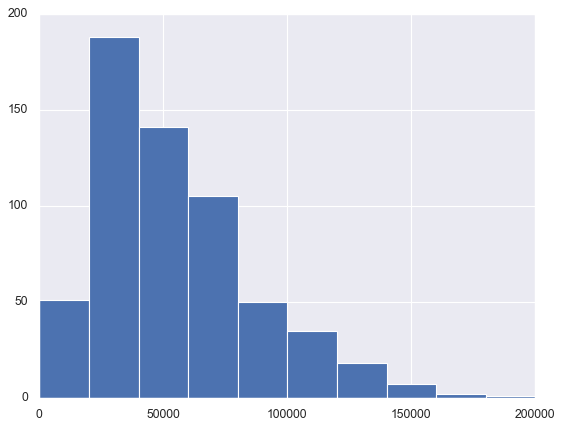

In [48]:
import matplotlib .pyplot as plt
import seaborn as sns

plt.style.use('classic')
%matplotlib inline
sns.set()


# Total number of shoes at certain price range
plt.hist(df['판매가격'],range=(0,200000))